# Graph at a given day

In [1]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb

from tigramite.models import LinearMediation, Prediction

import pandas as pd

/home/cide/anaconda3/envs/tigramite/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


## Load datasets

In [2]:
path = "/media/cide/datasets/CAMS/EEA_observations/pm25/"
file_pm25 = "cams-europe-pm25_nearest-pixel-observations_2020-2025.csv"
file_v10 = "cams-global-v10_nearest-pixel-observations_2020-2025.csv"
file_u10 = "cams-global-u10_nearest-pixel-observations_2020-2025.csv"
file_blh = "cams-global-blh_nearest-pixel-observations_2020-2025.csv"
file_t2m = "cams-global-t2m_nearest-pixel-observations_2020-2025.csv"
file_d2m = "cams-global-d2m_nearest-pixel-observations_2020-2025.csv"
file_pop = "cams-global-pop_nearest-pixel-observations_2020-2025.csv"
file_oro = "cams-global-elevation_nearest-pixel-observations_2020-2025.csv"

df_pm25 = pd.read_csv(path + file_pm25, index_col=0)
df_v10 = pd.read_csv(path + file_v10, index_col=0)
df_u10 = pd.read_csv(path + file_u10, index_col=0)
df_blh = pd.read_csv(path + file_blh, index_col=0)
df_t2m = pd.read_csv(path + file_t2m, index_col=0)
df_d2m = pd.read_csv(path + file_d2m, index_col=0)
df_pop = pd.read_csv(path + file_pop, index_col=0)
df_oro = pd.read_csv(path + file_oro, index_col=0)

In [3]:
df_pm25

,SPO-AD0942A-6001,SPO-AL0203A_06001_100,SPO-AL0204A_06001_100,SPO-AL0205A_06001_100,SPO-AL0206A_06001_100,SPO-AL0208A_06001_100,SPO-AL0201A_06001_100,SPO-AL0202A_06001_100,SPO.01.0001.65188.6001.1,SPO.01.0001.65507.6001.1,...,SPO-XK0003A_06001_100,SPO-XK0004A_06001_100,SPO-XK0005A_06001_100,SPO-XK0006A_06001_100,SPO-XK0007A_06001_100,SPO-XK0008A_06001_100,SPO-XK0009A_06001_100,SPO-XK0010A_06001_100,SPO-XK0011A_06001_100,SPO-XK0012A_06001_100
2020-01-01,1.717333e-09,7.233643e-09,5.521142e-09,7.685938e-09,4.728069e-09,8.810789e-09,7.850156e-09,7.850156e-09,1.064444e-08,1.064444e-08,...,1.136182e-08,1.050577e-08,1.102372e-08,1.120837e-08,8.598652e-09,1.085861e-08,1.375961e-08,1.455134e-08,1.455134e-08,1.455134e-08
2020-01-02,2.471481e-09,8.309292e-09,5.985443e-09,9.433873e-09,3.446824e-09,8.511140e-09,8.645537e-09,8.645537e-09,1.506390e-08,1.506390e-08,...,1.498907e-08,1.057670e-08,1.188124e-08,1.410861e-08,8.569798e-09,1.313161e-08,1.447712e-08,2.024047e-08,2.024047e-08,2.024047e-08
2020-01-03,3.793623e-09,8.228335e-09,5.614282e-09,1.130721e-08,3.007978e-09,9.510055e-09,1.206348e-08,1.206348e-08,1.633003e-08,1.633003e-08,...,1.651732e-08,1.034946e-08,1.374355e-08,1.196140e-08,6.132645e-09,1.411388e-08,1.415462e-08,2.489004e-08,2.489004e-08,2.489004e-08
2020-01-04,1.648974e-09,7.253634e-09,7.802313e-09,1.338732e-08,3.898474e-09,1.226884e-08,1.164712e-08,1.164712e-08,3.589319e-09,3.589319e-09,...,1.432344e-08,8.817707e-09,1.547935e-08,1.338440e-08,6.755520e-09,1.373100e-08,1.652529e-08,2.108397e-08,2.108397e-08,2.108397e-08
2020-01-05,1.082775e-09,5.167728e-09,6.954201e-09,6.329964e-09,2.286975e-09,8.837132e-09,6.409476e-09,6.409476e-09,4.230396e-09,4.230396e-09,...,5.163844e-09,4.013930e-09,6.072104e-09,7.169615e-09,4.644448e-09,6.897485e-09,6.544870e-09,8.582653e-09,8.582653e-09,8.582653e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-28,2.513690e-09,7.062161e-09,7.140756e-09,8.512935e-09,4.643573e-09,8.539534e-09,9.380588e-09,9.380588e-09,4.383784e-09,4.383784e-09,...,7.010487e-09,7.152565e-09,7.335236e-09,7.640502e-09,5.970878e-09,7.656929e-09,7.928423e-09,8.568345e-09,8.568345e-09,8.568345e-09
2025-05-29,1.992075e-09,6.365778e-09,5.664097e-09,5.976895e-09,4.268565e-09,6.361056e-09,7.928421e-09,7.928421e-09,2.756557e-09,2.756557e-09,...,6.606009e-09,5.518992e-09,7.150458e-09,7.387326e-09,6.048370e-09,7.587774e-09,7.876747e-09,9.603135e-09,9.603135e-09,9.603135e-09
2025-05-30,2.840286e-09,3.290025e-09,5.178674e-09,3.664395e-09,2.962356e-09,6.727628e-09,4.893848e-09,4.893848e-09,5.442940e-09,5.442940e-09,...,4.598765e-09,4.636741e-09,4.731959e-09,5.453697e-09,4.186905e-09,4.198663e-09,4.255297e-09,5.157451e-09,5.157451e-09,5.157451e-09
2025-05-31,4.857446e-09,6.113999e-09,4.864314e-09,5.488262e-09,4.280573e-09,5.522847e-09,6.603806e-09,6.603806e-09,6.411903e-09,6.411903e-09,...,6.498826e-09,6.339008e-09,6.189275e-09,8.033040e-09,5.831274e-09,7.099305e-09,6.746134e-09,8.195342e-09,8.195342e-09,8.195342e-09


In [4]:
day = 1000
df_day = pd.DataFrame({"pm25":df_pm25.iloc[day], "v10": df_v10.iloc[day], "u10": df_u10.iloc[day], "blh": df_blh.iloc[day], "t2m": df_t2m.iloc[day], "d2m": df_d2m.iloc[day], "population": df_pop.iloc[day], "oro": df_oro.iloc[day]}, index=df_pm25.columns)#.dropna()
df_day

,pm25,v10,u10,blh,t2m,d2m,population,oro
SPO-AD0942A-6001,1.370526e-09,-1.606041,0.295634,520.375671,282.804504,276.604614,2.080720,1705.204244
SPO-AL0203A_06001_100,2.941900e-09,1.038612,1.122965,363.832733,286.598450,284.755615,0.610630,827.737895
SPO-AL0204A_06001_100,3.733377e-09,4.384010,-0.206380,450.141327,293.414001,291.175049,1.868074,-28.178574
SPO-AL0205A_06001_100,5.042939e-09,5.827675,0.702555,481.406952,293.593811,291.181396,0.000000,0.000000
SPO-AL0206A_06001_100,2.773418e-09,1.379249,0.128214,188.774124,287.439758,286.598999,0.073958,1128.137879
...,...,...,...,...,...,...,...,...
SPO-XK0008A_06001_100,4.210157e-09,1.037697,-0.105550,491.039764,289.666687,284.953369,1.259077,737.753861
SPO-XK0009A_06001_100,5.552679e-09,1.847145,0.277079,493.543671,288.698547,284.797119,1.599213,529.153731
SPO-XK0010A_06001_100,5.869096e-09,2.204140,0.857157,505.180389,287.494568,284.047119,5.316527,553.886551
SPO-XK0011A_06001_100,5.869096e-09,2.204140,0.857157,505.180389,287.494568,284.047119,5.316527,553.886551


## Anomalies respect to european mean

In [10]:
df_day_anom = (df_day - df_day.mean())/df_day.std()

## Causal graph

In [11]:
#dataframe = pp.DataFrame(df_day.values, var_names=df_day.columns)
dataframe = pp.DataFrame(df_day_anom.values, var_names=df_day_anom.columns)
var_names = df_day.columns

parcorr = ParCorr()
pcmci_parcorr = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)
all_parents = pcmci_parcorr.run_pc_stable(tau_max=1, pc_alpha=0.2)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 1
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable pm25 has 6 link(s):
        (pm25 -1): max_pval = 0.00000, |min_val| =  0.730
        (blh -1): max_pval = 0.00000, |min_val| =  0.104
        (u10 -1): max_pval = 0.00713, |min_val| =  0.050
        (d2m -1): max_pval = 0.01907, |min_val| =  0.043
        (v10 -1): max_pval = 0.03671, |min_val| =  0.038
        (population -1): max_pval = 0.10699, |min_val| =  0.030

    Variable v10 has 4 link(s):
        (v10 -1): max_pval = 0.00000, |min_val| =  0.800
        (t2m -1): max_pval = 0.00037, |min_val| =  0.065
        (blh -1): max_pval = 0.00051, |min_val| =  0.064
        (pm25 -1): max_pval = 0.00950, |min_val| =  0.048

    Variable u10 has 5 link(s):
        (u10 -1): max_pval = 0.00000, |min_val| =  0.855
        (blh -1): max_pval = 0.0

In [17]:
results = pcmci_parcorr.run_pcmci(tau_max=1, pc_alpha=0.2, alpha_level = 0.01)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 1
pc_alpha = [0.2]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable pm25 has 6 link(s):
        (pm25 -1): max_pval = 0.00000, |min_val| =  0.730
        (blh -1): max_pval = 0.00000, |min_val| =  0.104
        (u10 -1): max_pval = 0.00713, |min_val| =  0.050
        (d2m -1): max_pval = 0.01907, |min_val| =  0.043
        (v10 -1): max_pval = 0.03671, |min_val| =  0.038
        (population -1): max_pval = 0.10699, |min_val| =  0.030

    Variable v10 has 4 link(s):
        (v10 -1): max_pval = 0.00000, |min_val| =  0.800
        (t2m -1): max_pval = 0.00037, |min_val| =  0.065
        (blh -1): max_pval = 0.00051, |min_val| =  0.064
        (pm25 -1): max_pval = 0.00950, |min_val| =  0.048

    Variable u10 has 5 link(s):
        (u10 -1): max_pval = 0.00000, |min_val| =  0.855
        (blh -1): max_pval = 0.0

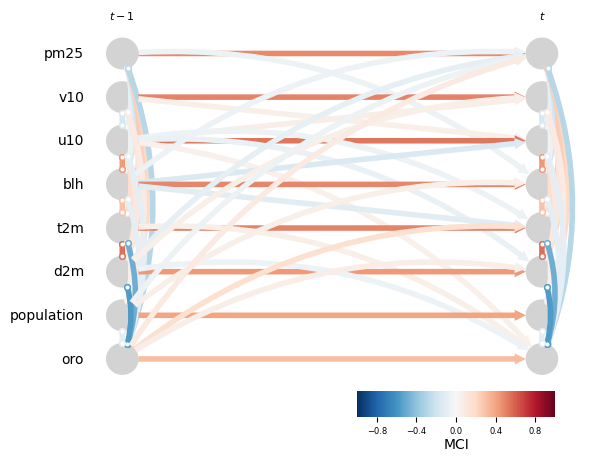

In [18]:
# Plot time series graph
tp.plot_time_series_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

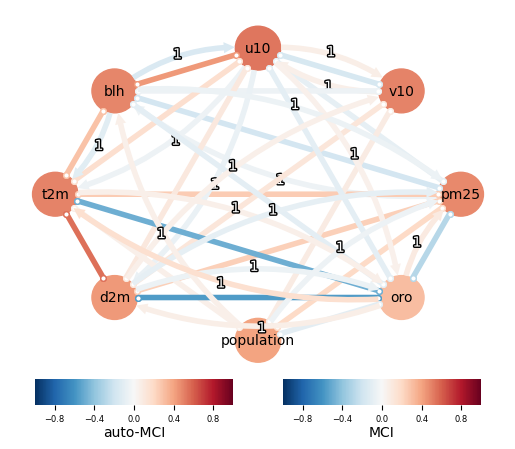

In [20]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    arrow_linewidth=4.0
    # graph=results_robust,
    # var_names=var_names,
    # show_colorbar=False,
    )

In [23]:
results["filtered_links"]= np.where(results["graph"]=="o-o","", results["graph"])

(<Figure size 640x480 with 1 Axes>, <Axes: >)

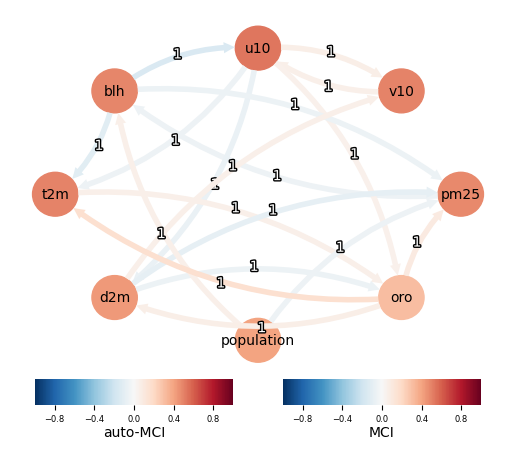

In [24]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results["filtered_links"],
    var_names=var_names,
    link_colorbar_label='MCI',
    arrow_linewidth=4.0
    # graph=results_robust,
    # var_names=var_names,
    # show_colorbar=False,
    )